<a href="https://colab.research.google.com/github/jt-ut/GaiaREU/blob/main/GaiaREU-ML_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome to REU's ML Workshop

Intro

Workflow: Exploratory Data Analysis, Unsupervised vs. Supervised ML

Data Description: Gaia XpSampledMeanSpectrum, briefly discuss pre-processing (unit normalization)

In [16]:
# Read data from web
import pandas as pd
flux = pd.read_csv('https://raw.githubusercontent.com/jt-ut/GaiaREU/main/GaiaREU_flux.csv', header=None)
wvl = pd.read_csv('https://raw.githubusercontent.com/jt-ut/GaiaREU/main/GaiaREU_wvl.csv', header=None)[0]

# Inspect the downloaded data
print(flux.shape)
print(wvl.shape)
print(flux.iloc[0])

(3981, 343)
(343,)
0      0.157631
1      0.140994
2      0.124082
3      0.120104
4      0.125592
         ...   
338    0.004656
339    0.004211
340    0.004113
341    0.004181
342    0.004694
Name: 0, Length: 343, dtype: float64


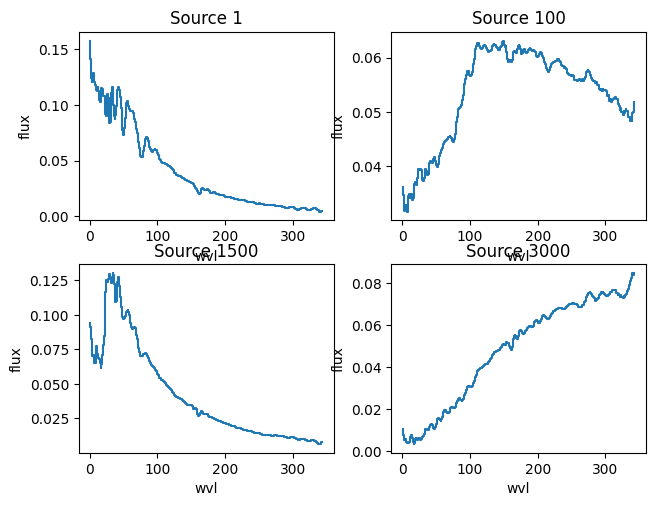

In [31]:
# Visualize a few source spectra
import seaborn as sns
from matplotlib import pyplot as plt

fig, axes = plt.subplots(2, 2)
fig.tight_layout()
sns.lineplot(x = 'wvl', y = 'flux', data = pd.DataFrame({'wvl': wvl, 'flux': flux.iloc[0]}), drawstyle='steps-pre', ax=axes[0,0]).set(title='Source 1')
sns.lineplot(x = 'wvl', y = 'flux', data = pd.DataFrame({'wvl': wvl, 'flux': flux.iloc[99]}), drawstyle='steps-pre', ax=axes[0,1]).set(title='Source 100')
sns.lineplot(x = 'wvl', y = 'flux', data = pd.DataFrame({'wvl': wvl, 'flux': flux.iloc[1499]}), drawstyle='steps-pre', ax=axes[1,0]).set(title='Source 1500')
sns.lineplot(x = 'wvl', y = 'flux', data = pd.DataFrame({'wvl': wvl, 'flux': flux.iloc[2999]}), drawstyle='steps-pre', ax=axes[1,1]).set(title='Source 3000')
plt.show()

##Dimensionality Reduction

What we have just done, plotting actual data vectors in their native space, is called ***data visualiation***. Visualizing your data is probably the easiest, and most intuitive, part of ***exploratory data analysis***, which allows us to get a crude summary of what's "going on" in our data. For example, our plots above indicate that the sources in our sample have drastically different spectral profiles.

Does each source have a (meaningfully) different spectra, or are there groups of sources with similar spectra? Since we can't realistically visualize the 343-dimensional spectra of all 3,000+ sources in our sample, we will instead build a *representation* of our data and visualize that. *Dimensionality Reduction* is the process of representing high-dimensional data in a lower dimensional space, usually 2-d or 3-d, for easy visualization. This is also called ***embedding*** our data.

There are many DR algorithms in statistics and machine learning. We introduce a few of the most common below.



(3981, 2)


[Text(0.5, 1.0, '2-d PCA Embedding')]

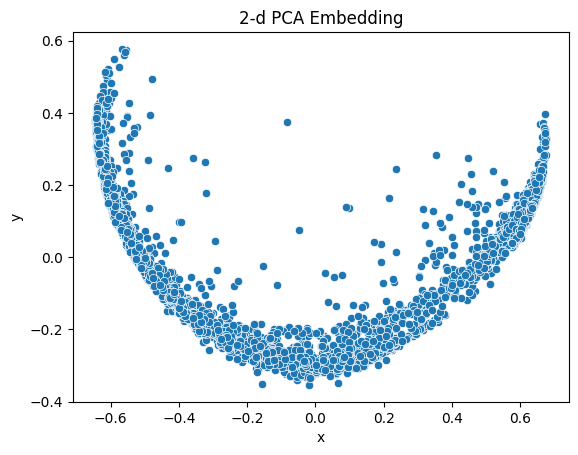

In [40]:
## PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # tell PCA to project our 343-d data to 2-d
X_pca = pca.fit_transform(flux) # run the PCA algorithm, transforming to 2-d

# Check that our embedded PCA data is actually 2-d, convert to a data frame for plotting
print(X_pca.shape)
X_pca = pd.DataFrame(X_pca, columns = ['x','y'])

# Visualize the PCA representation of our data
sns.scatterplot(x='x', y='y', data = X_pca).set(title='2-d PCA Embedding')

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3981 samples in 0.010s...
[t-SNE] Computed neighbors for 3981 samples in 0.537s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3981
[t-SNE] Computed conditional probabilities for sample 2000 / 3981
[t-SNE] Computed conditional probabilities for sample 3000 / 3981
[t-SNE] Computed conditional probabilities for sample 3981 / 3981
[t-SNE] Mean sigma: 0.022490
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.878189
[t-SNE] KL divergence after 1000 iterations: 0.770520


[Text(0.5, 1.0, '2-d t-SNE Embedding')]

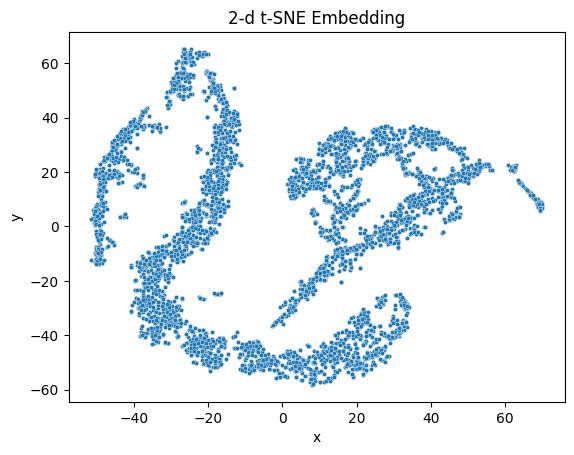

In [43]:
## t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state = 123, verbose=1, n_jobs=5)
X_tsne = tsne.fit_transform(flux)
X_tsne = pd.DataFrame(X_tsne, columns = ['x','y'])

# Visualize the t-SNE representation of our data
sns.scatterplot(x='x', y='y', data = X_tsne, s=10).set(title='2-d t-SNE Embedding')

In [34]:
!pip install umap-learn
import umap

In [38]:
type(Ypca)


numpy.ndarray